In [1]:
# lets try doing all this in pytoooorch

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset


#from source import Dataset as ds
#from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
#selecting features 
branches_to_use = [
"cscRechitClusterX",
"cscRechitClusterY",
"cscRechitClusterZ",
"cscRechitClusterTimeWeighted",
"cscRechitClusterTimeSpreadWeightedAll",
"cscRechitClusternXY",
"cscRechitClusternZ",
"cscRechitClusterXSpread",
"cscRechitClusterYSpread",
"cscRechitClusterZSpread",
"cscRechitClusterXYSpread",
"cscRechitClusterRSpread",
"cscRechitClusterEtaPhiSpread",
"cscRechitClusterEtaSpread",
"cscRechitClusterPhiSpread",
"cscRechitClusterDeltaRSpread",
"cscRechitClusterMajorAxis",
"cscRechitClusterMinorAxis",
"cscRechitClusterSkewX",
"cscRechitClusterSkewY",
"cscRechitClusterSkewZ",
"cscRechitClusterKurtX",
"cscRechitClusterKurtY",
"cscRechitClusterKurtZ", 
#"cscRechitClusterSize",
"cscRechitCluster_match_gLLP_e"
]

#energy key
truth_value = "cscRechitCluster_match_gLLP_e"
size_value = "cscRechitClusterSize"

#read data
#dataset_signal = ds.Dataset("signal")
#df_signal = dataset_signal.load_df("/nfs/dust/cms/user/loewetob/ML_LLP/MDS_regression/datasets/test_bigger_dataset.h5")

#cut clusters which don't have LLP
#olen = len(df_signal)
#df_signal = df_signal[ df_signal["cscRechitCluster_match_gLLP"]>=1 ]
#print('cut out ' + str(olen - len(df_signal)) + ' clusters, which leaves ' + str(len(df_signal)) + ' clusters containing a LLP decay for training')


In [8]:
df_signal = pd.read_hdf('gcndata_glvl.h5')

In [15]:
df_signal

,cscRechitClusterX,cscRechitClusterY,cscRechitClusterZ,cscRechitClusterTimeWeighted,cscRechitClusterTimeSpreadWeightedAll,cscRechitClusterTime,cscRechitClusterTimeSpread,cscRechitClusternXY,cscRechitClusternZ,cscRechitClusterXSpread,...,cscRechitClusterMinorAxis,cscRechitClusterSkewX,cscRechitClusterSkewY,cscRechitClusterSkewZ,cscRechitClusterKurtX,cscRechitClusterKurtY,cscRechitClusterKurtZ,cscRechitClusterPhi,cscRechitClusterEta,cscRechitCluster_match_gLLP_e
0,-138.806732,632.686279,-840.816711,5.114727,6.585391,5.738067,6.535855,55.0,55.0,22.584471,...,0.032285,-2.650515,-14.028798,0.060668,-1.058820,-1.460573,-1.470452,1.786767,-1.077286,108.286888
1,163.848969,166.184586,736.253906,-33.162510,12.568985,-34.912071,12.562634,57.0,57.0,45.193497,...,0.066804,30.732649,8.675519,61.625153,-0.934861,-1.187875,-1.459484,0.792475,1.866298,99.813904
2,-368.993042,-214.768661,-690.334412,-1.066650,9.462804,-0.566933,9.456563,254.0,254.0,28.449711,...,0.032417,-79.328110,-20.227047,-119.588188,9.346846,1.471736,18.136015,-2.614484,-1.257916,90.013954
3,-209.355896,-386.587738,921.330383,0.602103,9.488232,2.044143,9.488521,123.0,123.0,20.567471,...,0.030705,-13.153602,-10.078119,8.788766,-0.183109,-1.371722,-0.560612,-2.067127,1.485618,258.156677
4,162.949951,-392.275299,1011.986267,-0.566438,10.701680,1.840356,10.890076,380.0,380.0,22.671556,...,0.042096,6.453502,-5.511337,-40.607410,-0.162686,-0.799589,-0.463900,-1.177088,1.602653,134.888611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,32.796932,416.011932,859.548889,0.373818,16.038273,1.535494,16.095537,444.0,444.0,21.175175,...,0.050393,-2.248130,2.812188,70.219795,-0.174925,-1.090080,0.072446,1.492123,1.470052,123.891487
929,417.158264,175.900513,-925.281616,-0.481041,12.199575,1.949075,12.568431,276.0,276.0,35.137573,...,0.030692,16.019102,18.185633,-11.512364,-0.168678,0.792737,-1.536924,0.399041,-1.463051,111.807388
930,128.887344,197.772827,-994.805481,-0.272097,13.439157,3.330842,13.747252,1589.0,1589.0,26.148706,...,0.100586,14.425070,24.234791,22.177952,0.780371,0.880210,-1.483981,0.993231,-2.145382,248.193130
931,414.434998,-484.236633,-1010.239380,0.091606,10.294052,0.609839,10.339939,542.0,542.0,25.840275,...,0.027877,-0.791690,-0.495154,34.668972,-0.892329,-1.062649,-1.293403,-0.862915,-1.241012,90.588501


In [16]:
class mdsDataset(Dataset):
    def __init__(self, dataframe, feature_keys = branches_to_use[:-1], label_key = branches_to_use[-1]):
        self.dataframe = dataframe
        self.feature_keys = feature_keys
        self.label_key = label_key

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        sample = {
            'features': torch.tensor(self.dataframe.iloc[idx][self.feature_keys].tolist(), dtype=torch.float32),
            'label': torch.tensor(self.dataframe.iloc[idx][self.label_key], dtype=torch.float32).squeeze()
        }
        return sample
    
class mdsDataset2(Dataset):
    def __init__(self, dataframe, feature_keys = branches_to_use[:-1], label_key = branches_to_use[-1]):
        self.dataframe = dataframe
        self.feature_keys = feature_keys
        self.label_key = label_key

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        sample = {
            'features': torch.tensor(self.dataframe.iloc[idx][self.feature_keys].tolist(), dtype=torch.float32),
            'label': torch.tensor(self.dataframe.iloc[idx][self.label_key], dtype=torch.float32).squeeze()
        }
        return sample

In [17]:
#data = torch.load('/beegfs/desy/group/unihh2/cms-llp/run3/v10/ggH_HToSSTobbbb_MH-125_MS-15_CTau1000_13p6TeV/graphs/graphs9k8nn_' + str(1) + 'ONLYgLvl' + '.pt')

In [18]:
class MyModel(nn.Module):
    def __init__(self, input_size, layers = [50, 30, 20, 5, 1]):
        super(MyModel, self).__init__()
        
        self.fc_layers = nn.ModuleList()  # ModuleList to hold dynamically created layers
        
        # first layer
        self.fc_layers.append(nn.Linear(input_size, layers[0]))
        self.fc_layers.append(nn.ReLU())
        
        # other layers
        for i in range(len(layers) - 1):
            self.fc_layers.append(nn.Linear(layers[i], layers[i + 1]))
            self.fc_layers.append(nn.ReLU())

    def forward(self, x):
        for layer in self.fc_layers:
            x = layer(x)
        return x

In [19]:
model = MyModel(input_size=24)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
#train_data, testval_data = train_test_split(df_signal, train_size=0.6)
#test_data, val_data = train_test_split(testval_data, test_size=0.5)

train_data = df_signal[:6000]
val_data = df_signal[6000:8000]
test_data = df_signal[8000:]


batch_size = 256

train_dataset = mdsDataset(dataframe = train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = mdsDataset(dataframe = val_data)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataset = mdsDataset(dataframe = test_data)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [22]:
best_val_loss = float('inf')
num_epochs = 10

for epoch in range(num_epochs):
    # Training loop
    print('EPOCH' + str(epoch))
    model.train()
    for batch in train_loader:
        inputs = batch['features']
        labels = batch['label']
        optimizer.zero_grad()
        outputs = torch.flatten(model(inputs))
        loss = criterion(outputs, labels)
        #print('train loss ' + str(loss.item()))
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            inputs = batch['features']
            labels = batch['label']
            outputs = torch.flatten(model(inputs))
            val_loss = criterion(outputs, labels)
            #print('val loss ' + str(val_loss.item()))
            # Calculate additional validation metrics if needed

            # Save the model if it has the best validation loss
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                print('new best val loss ', val_loss)
                torch.save(model.state_dict(), 'best_model.pth')
print('best val loss' + str(best_val_loss))

EPOCH0
new best val loss  tensor(7971.9907)
new best val loss  tensor(7717.2979)
EPOCH1
new best val loss  tensor(7038.6318)
new best val loss  tensor(6849.5879)
EPOCH2
new best val loss  tensor(6306.0767)
new best val loss  tensor(6291.2871)
EPOCH3
new best val loss  tensor(5624.8428)
EPOCH4
new best val loss  tensor(5468.4268)
new best val loss  tensor(5371.2905)
EPOCH5
new best val loss  tensor(5320.8208)
EPOCH6
new best val loss  tensor(5288.3408)
new best val loss  tensor(5228.8218)
EPOCH7
new best val loss  tensor(5167.0405)
EPOCH8
new best val loss  tensor(5118.9189)
EPOCH9
new best val loss  tensor(5049.6689)
best val losstensor(5049.6689)


In [23]:
def predict_plot(pred, test_labels, title = None, axlabels = ('clusters', 'generated particle energy')):
    fig, ax = plt.subplots(figsize = (6, 4))
    
    histdata, bins, dummy = ax.hist(test_labels, bins = 50, histtype="step", color = 'b', label = 'truth')
    ax.hist(pred, bins = bins, histtype="step", color = 'r', label = 'predictions')
    ax.set_yscale('log')
    ax.set_ylabel(axlabels[0])
    ax.set_xlabel(axlabels[1])
    ax.legend()
    if title:
        ax.set_title(title)

In [24]:
model.eval()

labels = []
predictions = []

with torch.no_grad():
    for batch in test_loader:
        inputs = batch['features']
        label = batch['label']
        prediction = torch.flatten(model(inputs))
        predictions.append(prediction)
        labels.append(label)

In [25]:
p = [tensor.item() for tensor in predictions]
l = [tensor.item() for tensor in labels]

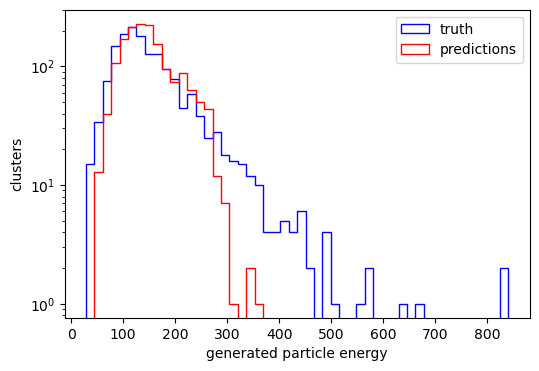

In [26]:
predict_plot(p, l)